<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/1.%20Business%20Intelligence%20and%20Sales%20Analysis/Online%20Retail%20Sales%20(Clustering)/Online_Retail_Sales_Cluestering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content
* 1. [Preparing Project](#1)
    * 1.1 [Import Libraries](#1.1)
    * 1.2 [Import Dataset](#1.2)
* 2. [Dataset Analysis](#2)
    * 2.1 [Understanding Dataset's Variable](#2.1)
    * 2.2 [Statistical Analysis](#2.2)
    * 2.3 [Unique Values](#2.3)
    * 2.4 [Missing Values](#2.4)
* 3. [Data Preprocessing](#3)
    * 3.1 [Dealing With Missing Values](#3.1)
    * 3.2 [Check Duplicates](#3.2)
    * 3.3 [Handling Negative Values](#3.3)
    * 3.4 [Handling Outlier Data](#3.4)
    * 3.5 [Extract Date Components](#3.5)
    * 3.6 [Add TotalPrice](#3.6)
* 4. [EDA](#4)
    * 4.1 [Products Per Shop](#4.1)
    * 4.2 [Customer Base By Countries](#4.2)
    * 4.3 [Total Sales By Hour](#4.3)
    * 4.4 [Total Sales By Hour](#4.4)
 5. [Preparing For Modelling](#5)
    * 5.1 [Scaling](#5.1)
    * 5.2 [Finding Optimal K](#5.2)
6. [KMeans](#6)




[Dataset Link](https://archive.ics.uci.edu/dataset/352/online+retail)


## 1. Preparing Project <a id=1></a>

### 1.1 Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### 1.2 Import Dataset <a id=-1.2></a>

In [35]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Dataset Analysis <a id=2></a>

In [37]:
df.shape

(541909, 8)

In [38]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### 2.1 Understaning Dataset's Variables <a id=2.1></a>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


1. **InvoiceNo**: A unique identifier for each transaction (invoice) in the dataset. It is an object (string) data type.
2. **StockCode**: A unique identifier for each product (item) being sold. It is an object (string) data type.
3. **Description**: A brief description of the product. It is an object (string) data type. Some descriptions are missing (540,455 non-null entries).
4. **Quantity**: The quantity of the product purchased in each transaction. It is an integer (int64) data type.
5. **InvoiceDate**: The date and time when the transaction (invoice) was generated. It is a datetime (datetime64[ns]) data type.
6. **UnitPrice**: The price per unit of the product. It is a floating-point (float64) data type.
7. **CustomerID**: A unique identifier for each customer. It is a floating-point (float64) data type. Some customer IDs are missing (406,829 non-null entries).
8. **Country**: The country where the customer resides. It is an object (string) data type.

### 2.2 Statistical Analysis <a id=2.2></a>

In [40]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


#### Quantity
- **Count**: 541,909 entries.
- **Mean**: Average quantity purchased per transaction is approximately 9.55 units.
- **Min**: The minimum quantity is -80,995, indicating possible returns or data entry errors.
- **25%**: 25th percentile is 1, meaning 25% of transactions involve purchasing only 1 unit.
- **50% (Median)**: The median quantity is 3 units.
- **75%**: 75th percentile is 10 units, meaning 75% of transactions involve purchasing up to 10 units.
- **Max**: The maximum quantity is 80,995 units, suggesting either a large bulk purchase or potential data entry error.
- **Standard Deviation (std)**: The standard deviation is 218.08, indicating high variability in the quantity of items purchased.

#### InvoiceDate
- **Count**: 541,909 entries.
- **Mean**: The average date of transactions is around July 4, 2011.
- **Min**: The earliest transaction date is December 1, 2010.
- **25%**: The first quartile date is March 28, 2011.
- **50% (Median)**: The median transaction date is July 19, 2011.
- **75%**: The third quartile date is October 19, 2011.
- **Max**: The latest transaction date is December 9, 2011.

#### UnitPrice
- **Count**: 541,909 entries.
- **Mean**: The average unit price is approximately $4.61.
- **Min**: The minimum price is -$11,062.06, indicating possible data errors (negative prices are invalid).
- **25%**: The 25th percentile price is $1.25.
- **50% (Median)**: The median unit price is $2.08.
- **75%**: The 75th percentile price is $4.13.
- **Max**: The maximum price is $38,970, suggesting outliers or high-priced items.
- **Standard Deviation (std)**: The standard deviation is 96.76, showing high variability in unit prices.

#### CustomerID
- **Count**: 406,829 entries (missing values for some transactions).
- **Mean**: The average customer ID is approximately 15,287.69.
- **Min**: The minimum customer ID is 12,346.
- **25%**: The 25th percentile customer ID is 13,953.
- **50% (Median)**: The median customer ID is 15,152.
- **75%**: The 75th percentile customer ID is 16,791.
- **Max**: The maximum customer ID is 18,287.
- **Standard Deviation (std)**: The standard deviation is 1,713.60, indicating a wide range of customer IDs.

In [41]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


#### InvoiceNo
- **Count**: There are 541,909 invoice entries.
- **Unique**: There are 25,900 unique invoice numbers, indicating multiple transactions under the same invoice number.
- **Top**: The most frequent invoice number is 573585.
- **Frequency (freq)**: This top invoice number appears 1,114 times, suggesting that this invoice might represent a large bulk order or recurring transactions.

#### StockCode
- **Count**: There are 541,909 stock code entries.
- **Unique**: There are 4,070 unique stock codes, indicating a wide variety of different products.
- **Top**: The most frequent stock code is 85123A.
- **Frequency (freq)**: This top stock code appears 2,313 times, showing that this product is highly popular or frequently purchased.

#### Description
- **Count**: There are 540,455 non-null description entries, meaning there are 1,454 missing descriptions.
- **Unique**: There are 4,223 unique product descriptions, matching closely with the unique stock codes, implying each product has a distinct description.
- **Top**: The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER."
- **Frequency (freq)**: This top description appears 2,369 times, indicating it is a best-seller or a very common product in the dataset.

#### Country
- **Count**: There are 541,909 country entries.
- **Unique**: There are 38 unique countries, suggesting a broad international customer base.
- **Top**: The most frequent country is the "United Kingdom."
- **Frequency (freq)**: The United Kingdom appears 495,478 times, showing that the majority of transactions are from the UK.

### Summary
- **InvoiceNo**: There are many repeated invoices, suggesting multiple items per invoice or recurring transactions.
- **StockCode**: A wide variety of products are sold, with some products being very popular.
- **Description**: Each product typically has a unique description, with some products being sold very frequently.
- **Country**: The business has a predominantly UK-based customer base, but it does have international reach with transactions from 38 different countries.

### 2.3 Unique Values <a id=2.3></a>

In [42]:
pd.DataFrame(df.nunique(), columns=['Count'])

,Count
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [43]:
df.select_dtypes(include='object').columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [45]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### 2.4 Missing Values <a id=2.4></a>

In [46]:
df.isnull().values.any()

True

In [47]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 3. Data Cleaning <a id=3></a>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 3.1 Dealing With Missing Values <a id=3.1></a>

In [49]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [50]:
# Drop Missing Values in CustomerID
df = df.dropna(subset=['CustomerID'], axis=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [51]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3.2 Check Duplicates <a id=3.2></a>

In [52]:
df.duplicated().sum()

5225

In [53]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

In [55]:
df.shape

(401604, 8)

### 3.3 Handling Negative Values <a id=3.3></a>

In [61]:
print("Negative value in Quantity is:",(df.Quantity<0).sum())
print("Negative value in Price is:",(df.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


In [60]:
df = df[~df.InvoiceNo.str.contains('C',na=False)]

### 3.4 Handling Outlier Data <a id=3.4></a>

In [64]:
def remove_outliers(df, columns):
    """
    Remove outliers from the specified columns of a dataframe using the IQR method.

    Parameters:
    df (pd.DataFrame): The dataframe to process.
    columns (list): List of column names to check for outliers.

    Returns:
    pd.DataFrame: The dataframe with outliers removed.
    """
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataframe to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [65]:
df_2 = remove_outliers(df, ['Quantity', 'UnitPrice'])

# Display the cleaned dataframe
df_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [103]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333265 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    333265 non-null  object        
 1   StockCode    333265 non-null  object        
 2   Description  333265 non-null  object        
 3   Quantity     333265 non-null  int64         
 4   InvoiceDate  333265 non-null  datetime64[ns]
 5   UnitPrice    333265 non-null  float64       
 6   CustomerID   333265 non-null  float64       
 7   Country      333265 non-null  object        
 8   Date         333265 non-null  object        
 9   Month        333265 non-null  object        
 10  Week         333265 non-null  object        
 11  Time         333265 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 33.1+ MB


### 3.5 Extract Date Components <a id=3.5></a>

In [95]:
# Create 'date', 'month', 'week', and 'time' columns
df_2['Date'] = df_2['InvoiceDate'].dt.strftime('%m/%d/%Y')
df_2['Month'] = df_2['InvoiceDate'].dt.strftime('%B')
df_2['Week'] = df_2['InvoiceDate'].dt.strftime('%A')
df_2['Time'] = df_2['InvoiceDate'].dt.strftime('%H')

df_2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Week,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,December,Wednesday,08


### 3.6 Add TotalPrice <a id=3.6></a>

In [106]:
df_2['TotalPrice'] = df_2['UnitPrice'] * df_2['Quantity']
df_2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Week,Time,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,December,Wednesday,08,15.3


## 4. EDA <a id=4></a>

### 4.1 Products Per Shop <a id=4.1></a>

In [96]:
# Get the top 10 most preferred products
most_preferred_products = df_2['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

### 4.2 Customer Base By Countries <a id=4.2></a>

In [97]:
countries = df_2['Country'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

### 4.3 Total Sales Per Month <a id=4.3></a>

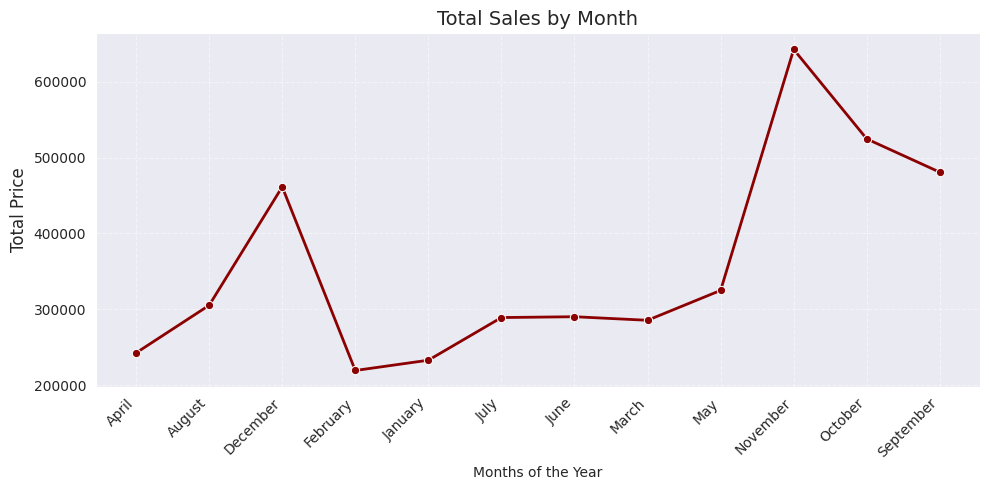

In [109]:
df_2_months = df_2.groupby('Month').agg({'TotalPrice': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.lineplot(data=df_2_months, x='Month', y='TotalPrice', marker='o', color='darkred', linewidth=2)
plt.title('Total Sales by Month', fontsize=14)
plt.xlabel('Months of the Year', fontsize=10)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4.3 Sales Per Day <a id=4.3></a>

In [105]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333265 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    333265 non-null  object        
 1   StockCode    333265 non-null  object        
 2   Description  333265 non-null  object        
 3   Quantity     333265 non-null  int64         
 4   InvoiceDate  333265 non-null  datetime64[ns]
 5   UnitPrice    333265 non-null  float64       
 6   CustomerID   333265 non-null  float64       
 7   Country      333265 non-null  object        
 8   Date         333265 non-null  object        
 9   Month        333265 non-null  object        
 10  Week         333265 non-null  object        
 11  Time         333265 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 33.1+ MB


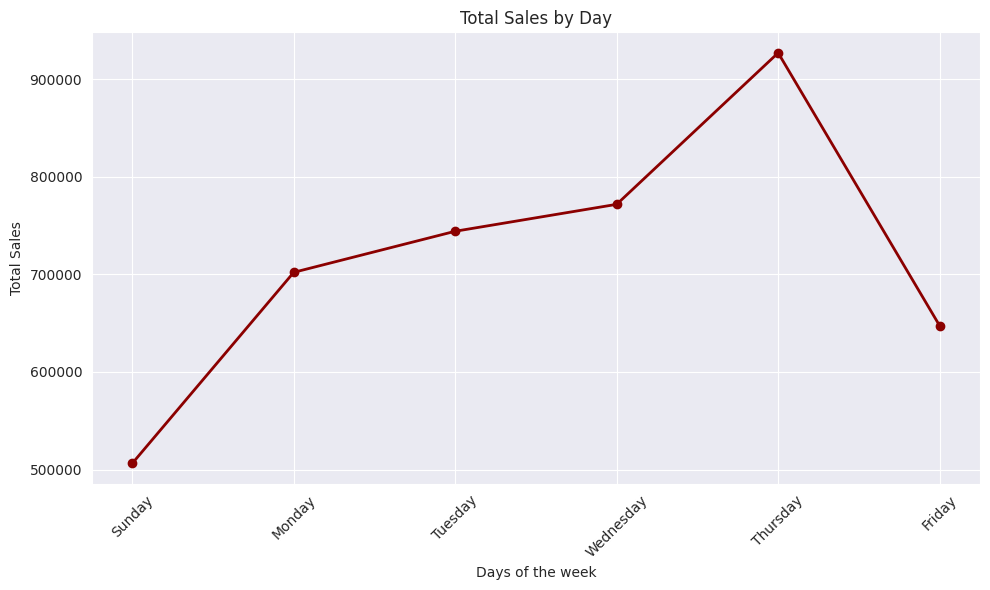

In [112]:
# Calculating total sales on a daily basis
daywise = df_2.groupby('Week').agg({'TotalPrice': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['Week'] = pd.Categorical(daywise['Week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('Week')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(daywise['Week'], daywise['TotalPrice'], marker='o', color='darkred', linewidth=2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.4 Total Sales By Hour <a id=4.4></a>


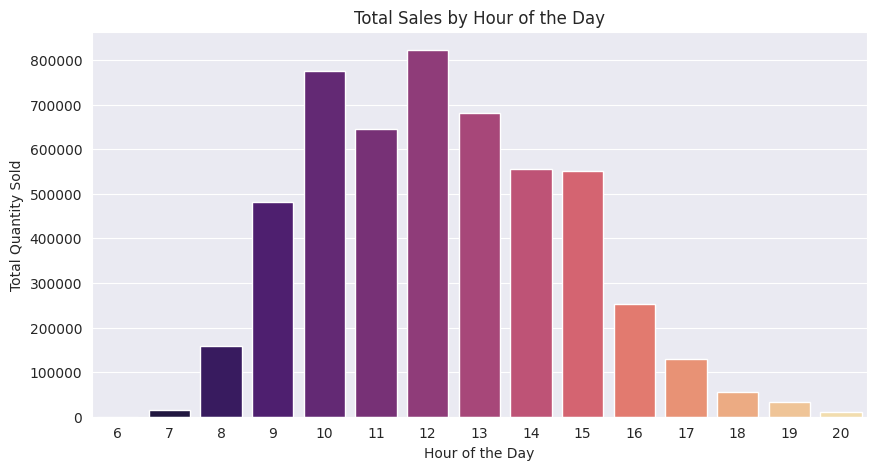

In [116]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='magma')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.show()

## 5. Preparing For Modelling <a id=5></a>

In [174]:
import datetime as dt

Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
df_model = df_2.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                 'InvoiceNo': lambda x: x.nunique(),
                                                 "TotalPrice": lambda x: x.sum()})
df_model

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,7,3314.73
12348.0,248,3,90.20
12349.0,18,1,999.15
12350.0,310,1,294.40
12352.0,36,7,1130.94
...,...,...,...
18280.0,277,1,137.00
18281.0,180,1,46.92
18282.0,7,2,113.13


### 5.1 Scaling <a id=5.1></a>

In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

In [176]:
df_scaled

array([[-0.9008155 ,  0.42494771,  1.04062948],
       [ 1.56202716, -0.14468401, -0.42525375],
       [-0.74063062, -0.42949987, -0.01204173],
       ...,
       [-0.85075773, -0.28709194, -0.41482968],
       [-0.89080395,  1.70661906,  0.44414398],
       [-0.50035328, -0.14468401, -0.02949396]])

### 5.2 Finding Optimal K

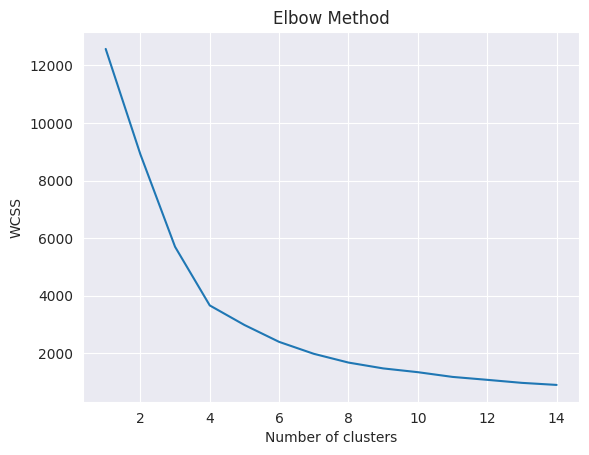

In [177]:
from sklearn.cluster import KMeans

# List to store the WCSS values
wcss = []

# Run K-Means for different values of k
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plotting the Elbow Graph
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6. KMeans <a id=6></a>

In [186]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=50, random_state = 0)

y_kmeans = kmeans.fit_predict(df_scaled)
# the fit_predict will train and return the dependent variable

print(y_kmeans)

[0 1 0 ... 0 2 0]


In [179]:
y_kmeans.shape

(4192,)

In [191]:
# Adding Cluster column to df_model
df_model['Cluster'] = kmeans.labels_

# Recheck df_model
df_model

,InvoiceDate,InvoiceNo,TotalPrice,Cluster
CustomerID,,,,
12347.0,2,7,3314.73,0
12348.0,248,3,90.20,1
12349.0,18,1,999.15,0
12350.0,310,1,294.40,1
12352.0,36,7,1130.94,0
...,...,...,...,...
18280.0,277,1,137.00,1
18281.0,180,1,46.92,1
18282.0,7,2,113.13,0


In [192]:
# Check Customer by Clusters
df_model.groupby('Cluster')[['TotalPrice']].agg(['mean', 'sum'])

TotalPrice             
                 mean          sum
Cluster                           
0          837.244992  2412102.823
1          308.548041   322741.251
2         5327.811762  1390558.870
3        43518.310000   174073.240